<a href="https://colab.research.google.com/github/brl0/datacamp_courses/blob/master/datacamp_clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simple clustering analysis of courses by DataCamp.

In [0]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

from sklearn.cluster import AgglomerativeClustering
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [0]:
!pip install spacy
!python -m spacy download en_core_web_lg
import spacy
nlp = spacy.load('en_core_web_lg')

     |████████████████████████████████| 852.3MB 1.2MB/s 
  Stored in directory: /tmp/pip-ephem-wheel-cache-mpyck5oj/wheels/0d/bc/67/e6a9108ab86cd076703af19ad4e0f02f57381ac6583df16249
Successfully built en-core-web-lg

    Linking successful
    /usr/local/lib/python3.6/dist-packages/en_core_web_lg -->
    /usr/local/lib/python3.6/dist-packages/spacy/data/en_core_web_lg

    You can now load the model via spacy.load('en_core_web_lg')



In [0]:
r = requests.get('https://www.datacamp.com/courses/tech:python')
data = r.text
soup = BeautifulSoup(data)
courses = [item for item in soup.select('body > div.site-wrap > section.courses__explore.dc-u-mt-48 > div > div > article')]
print(len(courses))


87


In [0]:
courses[0]

<article class="course-block-wrapper col-lg-4 col-sm-6 " data-id="735">
<div class="course-block ">
<a class="course-block__link ds-snowplow-link-course-block" href="/courses/intro-to-python-for-data-science">
<div class="course-block__technology course-block__technology--python"></div>
<div class="course-block__body">
<h4 class="course-block__title">Introduction to Python</h4>
<p class="course-block__description">
          Master the basics of data analysis in Python. Expand your skill set by learning scientific computing with numpy.
        </p>
<div class="course-block__extra-info dc-u-fx dc-u-fx-aifs dc-u-fx-jcc dc-u-fx-fww">
<span class="course-block__length dc-u-mh-12 dc-u-fx-center">
<span class=" dc-icon dc-icon--size-12 dc-icon--primary dc-icon--flex dc-u-mr-8 ">
<svg class="dc-icon__svg">
<use xlink:href="#clock"></use>
</svg>
</span>

                4 hours
              </span>
</div>
</div>
</a> <div class="course-block__footer">
<a class="course-block__footer-link link-

In [0]:
df = pd.DataFrame(
    [(
        course.select('div > a > div.course-block__body > h4')[0].text.strip(),
        course.select('div > a > div.course-block__body > p')[0].text.strip(),
        course.select('div > div > a > div > div > p.course-block__author-name')[0].text.strip(),
        course.select('div > a > div > div > p.course-block__author-occupation')[0].text.strip()
    )
        for course in courses], columns=['title', 'text', 'author', 'occupation']
)

In [0]:
docs = [f'{row.title}\n{row.text}\n{row.author}\n{row.occupation}' for index, row in df.iterrows()]
titles = np.array([f'{row.title}' for index, row in df.iterrows()])
X = np.array([nlp(doc).vector for doc in docs])

In [0]:
clustering = AgglomerativeClustering().fit(X)

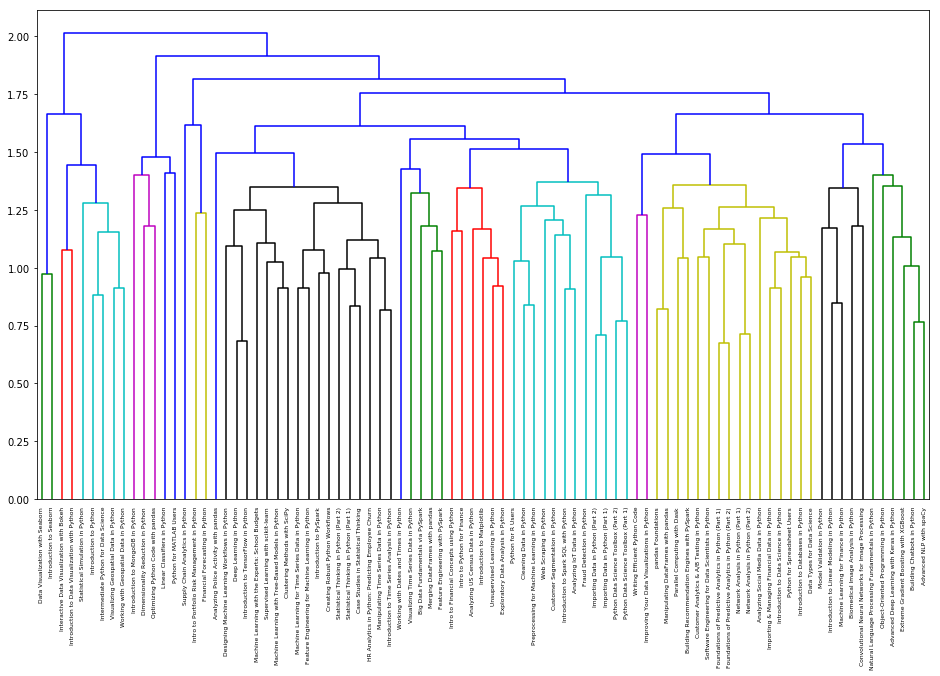

In [0]:
_ = plt.figure(figsize=(16,9))
mergings = linkage(X, method='complete')
dendrogram(mergings, labels=titles, leaf_rotation=90, leaf_font_size=6)
_ = plt.show()